In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display

In [2]:
df = pd.read_csv('merged_dataset_FINAL_PAKE_INI.csv')

In [3]:
#analisis deskriptif 
#1 penyakit paling umum tiap negara
disease_counts = df.groupby(['country', 'disease_name', 'year']).agg(
    Count=('disease_name', 'size'),
    Total_Population_Affected=('ppl_affected', 'sum')
).reset_index()


most_common_disease = disease_counts.loc[disease_counts.groupby('country')['Total_Population_Affected'].idxmax()]

most_common_disease

,country,disease_name,year,Count,Total_Population_Affected
234,Argentina,Tuberculosis,2010,45,34218252
455,Australia,Parkinson's Disease,2010,45,33795230
621,Brazil,Ebola,2020,43,34141316
1024,Canada,Tuberculosis,2020,46,33744108
1103,China,Cholera,2021,46,32757237
1546,France,Tuberculosis,2022,45,34112798
1583,Germany,Asthma,2020,45,35693666
1822,India,Alzheimer's Disease,2012,44,33575553
2218,Indonesia,Hypertension,2018,45,34207052
2599,Italy,Zika,2022,43,32795609


In [4]:
#2 treatment cost negara
df['Affordable'] = df['GDP per capita'] >= df['avg_trtmt_cost']

# groupby berdasarkan negara, GDP per kapita, penyakit, dan biaya pengobatan rata-rata
affordability_summary = df.groupby(['country','year', 'GDP per capita', 'disease_name', 'avg_trtmt_cost'])['Affordable'].all().reset_index()

affordability_summary #asumsi bahwa avg treatment costnya memang pertahun

affordability_summary

,country,year,GDP per capita,disease_name,avg_trtmt_cost,Affordable
0,Argentina,2010,18979.992,Alzheimer's Disease,1677,True
1,Argentina,2010,18979.992,Alzheimer's Disease,3173,True
2,Argentina,2010,18979.992,Alzheimer's Disease,4106,True
3,Argentina,2010,18979.992,Alzheimer's Disease,4513,True
4,Argentina,2010,18979.992,Alzheimer's Disease,5215,True
...,...,...,...,...,...,...
196803,Turkey,2022,27361.988,Zika,44456,False
196804,Turkey,2022,27361.988,Zika,44594,False
196805,Turkey,2022,27361.988,Zika,49004,False
196806,Turkey,2022,27361.988,Zika,49597,False


In [5]:
# Menentukan apakah biaya pengobatan terjangkau berdasarkan GDP per kapita
df['Affordable'] = df['GDP per capita'] >= df['avg_trtmt_cost']

# Groupby berdasarkan negara untuk menghitung persentase penyakit yang terjangkau
affordability_per_country = df.groupby('country').agg(
    total_diseases=('disease_name', 'count'),  # Total penyakit per negara
    affordable_diseases=('Affordable', 'sum')  # Jumlah penyakit yang terjangkau
).reset_index()

# Hitung persentase affordability
affordability_per_country['affordability_percentage'] = (
    affordability_per_country['affordable_diseases'] / affordability_per_country['total_diseases']
) * 100
# Menentukan kategori kemampuan negara berdasarkan affordability percentage
def categorize_affordability(percentage):
    if percentage >= 70:
        return "Mampu"
    elif percentage >= 40:
        return "Sedang"
    else:
        return "Tidak Mampu"

# Tambahkan kategori ke dataframe
affordability_per_country['affordability_category'] = affordability_per_country['affordability_percentage'].apply(categorize_affordability)


affordability_per_country


,country,total_diseases,affordable_diseases,affordability_percentage,affordability_category
0,Argentina,10938,4206,38.453099,Tidak Mampu
1,Australia,10965,10592,96.598267,Mampu
2,Brazil,10931,3149,28.807977,Tidak Mampu
3,Canada,10959,9542,87.069988,Mampu
4,China,10889,3115,28.606851,Tidak Mampu
5,France,10915,8102,74.228126,Mampu
6,Germany,10937,9762,89.256652,Mampu
7,India,10917,1222,11.193551,Tidak Mampu
8,Indonesia,10902,2394,21.959274,Tidak Mampu
9,Italy,10916,7470,68.431660,Sedang


C:\Users\Fezza Ganteng\AppData\Local\Temp\ipykernel_13608\3029176527.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


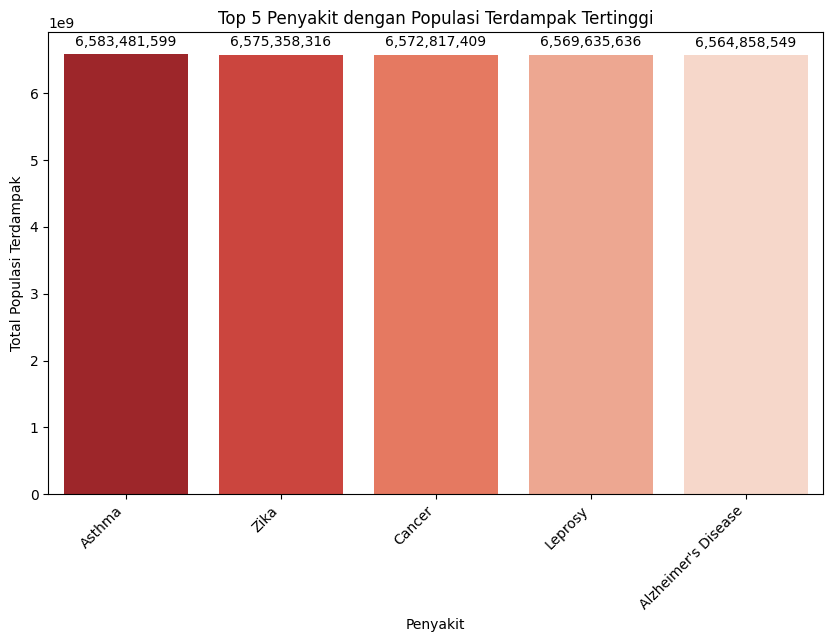

In [6]:


# Hitung total populasi terdampak per penyakit
disease_impact = df.groupby('disease_name').agg(
    Total_Population_Affected=('ppl_affected', 'sum')
).reset_index()

# Ambil 5 penyakit dengan populasi terdampak tertinggi
top_5_diseases = disease_impact.nlargest(5, 'Total_Population_Affected')

# Visualisasi (Bar Chart Vertikal)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_5_diseases["disease_name"],
    y=top_5_diseases["Total_Population_Affected"],
    palette="Reds_r"
)

plt.xlabel("Penyakit")
plt.ylabel("Total Populasi Terdampak")
plt.title("Top 5 Penyakit dengan Populasi Terdampak Tertinggi")


plt.xticks(rotation=45, ha='right')

for index, value in enumerate(top_5_diseases["Total_Population_Affected"]):
    plt.text(index, value + 0.02 * max(top_5_diseases["Total_Population_Affected"]), f'{int(value):,}', ha='center', fontsize=10)

plt.show()


In [7]:
#3 faskes
facility_data = disease_counts.merge(
    df[['country', 'disease_name', 'year', 'doctors_per_1000', 'hospital_beds_per_1000']], 
    on=['country', 'disease_name', 'year'], how='left'
).drop_duplicates()


# pake standar WHO
doctor_threshold = 2
hospital_beds_threshold = 3.5
facility_data['facility_ready'] = (facility_data['doctors_per_1000'] > doctor_threshold) & (facility_data['hospital_beds_per_1000'] > hospital_beds_threshold) 
print("Evaluasi kesiapan fasilitas kesehatan berdasarkan standar WHO:")
facility_data
#ambiul presentase negara yang mumpuni ambil tahun yang paling baru lalui groupby by coiuntry, lalu ambil rata2 hospital bed, docter/1000, dari situ bisa breakdown lagi doctornya rasionya mumpuni gk


Evaluasi kesiapan fasilitas kesehatan berdasarkan standar WHO:


,country,disease_name,year,Count,Total_Population_Affected,doctors_per_1000,hospital_beds_per_1000,facility_ready
0,Argentina,Alzheimer's Disease,2010,45,31236659,1.53,5.71,False
1,Argentina,Alzheimer's Disease,2010,45,31236659,3.01,1.80,False
2,Argentina,Alzheimer's Disease,2010,45,31236659,0.80,5.79,False
3,Argentina,Alzheimer's Disease,2010,45,31236659,3.09,4.38,True
4,Argentina,Alzheimer's Disease,2010,45,31236659,1.82,9.59,False
...,...,...,...,...,...,...,...,...
196882,Turkey,Zika,2022,45,28867135,3.51,4.43,True
196883,Turkey,Zika,2022,45,28867135,1.64,9.05,False
196884,Turkey,Zika,2022,45,28867135,1.07,2.71,False
196885,Turkey,Zika,2022,45,28867135,1.06,1.22,False


In [ ]:
#inferensial 
# 1. Perbandingan penyebaran penyaklit  (template sisa isi sendiri )
country_a = df[(df['country'] == 'Argentina') & (df['disease_name'] == 'Asthma')]
country_b = df[(df['country'] == 'Brazil') & (df['disease_name'] == 'Asthma')]
stat, p_value = stats.ttest_ind(country_a['prevalence_rate'], country_b['prevalence_rate'], equal_var=False)
print(f" {p_value}")

#kalau p value >0.05 maka penyakit yang diinput tidak ada perbedaan dalam penyebarannya di antara 2 negara

 0.9521560713332262


In [30]:
# 2. Perbandingan mortality rate dengan tingkat edukasi
low_edu = df[df['edc_index'] < df['edc_index'].median()]['mortality_rate']
high_edu = df[df['edc_index'] >= df['edc_index'].median()]['mortality_rate']

stat, p_value = stats.ttest_ind(low_edu, high_edu, equal_var=False)
print(f"{p_value}")
#p value > dari 0.05 jadi tingkat mortalitas tidak ada hubungan dengan tingkat edukasi
#education_index yang bagus akan membuat suplay dokternya mumpuni kalau mumpuini apakah mortalitynya rendah bedakan 
#lakukan 1 lagi inferensial yg ini docter/1000 dengan education index dan docter/100 dan mortality rate

0.6270054480374121


In [ ]:
# --- 1. Perbandingan Mortality Rate dengan Tingkat Edukasi ---
low_edu = df[df['edc_index'] < df['edc_index'].median()]['mortality_rate']
high_edu = df[df['edc_index'] >= df['edc_index'].median()]['mortality_rate']


stat, p_value = stats.ttest_ind(low_edu, high_edu, equal_var=False)
print(f"P-value untuk perbedaan mortality rate berdasarkan education index: {p_value}")

correlation_edu_doctors, p_edu_doctors = stats.pearsonr(df['edc_index'], df['doctors_per_1000'])
print(f"Korelasi antara education index dan jumlah dokter per 1000 orang: {correlation_edu_doctors}, P-value: {p_edu_doctors}")

correlation_doctors_mortality, p_doctors_mortality = stats.pearsonr(df['doctors_per_1000'], df['mortality_rate'])
print(f"Korelasi antara jumlah dokter per 1000 orang dan mortality rate: {correlation_doctors_mortality}, P-value: {p_doctors_mortality}")

#Korelasi education index dan jumlah dokter /1000 orang nilainya 0.00018 dekat dengan 0 artinya tidak ada hubungannya
#P value 0.936 jauh di atas 0.05 artinya tidak berhubungan signifikan secara statistik
#Pendidikan yang lebih tinggi tidak selalu berbanding lurus dengan jumlah dokter.


#korelasi jumlah dokter/1000 dengan mortality rate nilainua 0.0036 Hampir tidak ada hubungan antara jumlah dokter dengan kematian
#p-value 0.108 walau lebih rendah dari yg sebelumnya masih di atas 0.05 yg artinya tidak ada bukti untuk kalau jumlah dokter itu berpengaruh dengan tingkat kematian
#Jumlah banyaknya dokter belum tentu menurunkan tingkat kematian

#pvalue perbedaan mortality rate based on Education index, Pvaluenya 0.0627, jauh di atas 0.05, artinya tidak ada hubungan erat antara tingkat pendidikan dengan tingkat kematian di dataset ini




P-value untuk perbedaan mortality rate berdasarkan education index: 0.6270054480374121
Korelasi antara education index dan jumlah dokter per 1000 orang: 0.00018124375068241842, P-value: 0.93590252276179
Korelasi antara jumlah dokter per 1000 orang dan mortality rate: 0.003623802081087053, P-value: 0.10784684402984947


In [ ]:
# 3. Pengaruh income yerhadap kematian terhadap penyakit (sisa isi)
x_df = df[df['disease_name'] == 'Asthma']
correlation, p_value = stats.pearsonr(x_df['GDP per capita'], x_df['mortality_rate'])
print(f"korelasi: {correlation}, P-value: {p_value}")

#nilai korelasi itu kecil tidak mendekati 1 artinya tidak ada korelasi anyata kematian dan income berdasarkan gdp
#P value > dari 0.05 jadi tidak ada hubungan anyata pendapatan berbasis gdp dengan kematian dari penyakit asthma

korelasi: 0.0007612491356099298, P-value: 0.93965221200381


In [23]:
# 4. Uji Normalitas Distribusi Tingkat Kematian
shapiro_stat, shapiro_p = stats.shapiro(df['mortality_rate'])
print(f"\n P-value: {shapiro_p}")
if shapiro_p > 0.05:
    print("dekat normal.")
else:
    print("tidak normal.")


 P-value: 2.702752622375903e-104
tidak normal.


C:\Users\Fezza Ganteng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 196887.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# 5. Uji Korelasi antara Akses Kesehatan dan Mortalitas
corr_healthcare, p_healthcare = stats.pearsonr(df['healthcare_access'], df['mortality_rate'])
print(f"\nKorelasi  {corr_healthcare}, P-value: {p_healthcare}")

#korelasinya -9 sangat jauh dari 0 artinya tidak ada korelasi antara akses kesehatan dengan kematian
#p value > 0.05 jadi tidak ada hubungan antara akses kesehatan dan kemarian



Korelasi  -9.435177786934373e-05, P-value: 0.9346810169144584


Uji t antara tingkat mortalitas pria dan wanita: t-statistic = -0.72, p-value = 0.46928


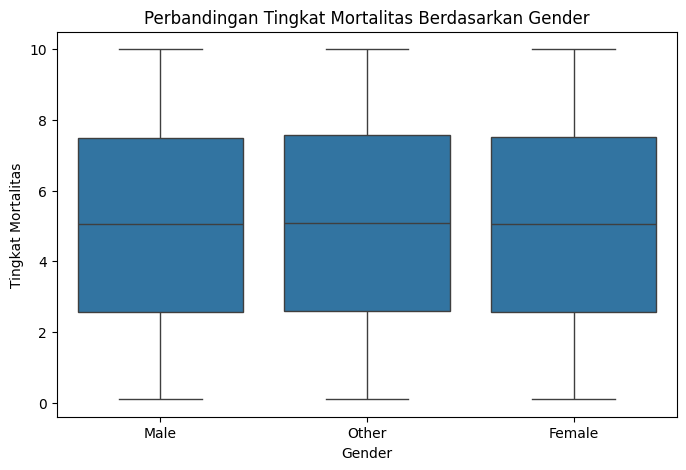

In [6]:

# 2. Uji t untuk perbedaan rata-rata tingkat mortalitas berdasarkan gender
male_mortality = df[df['gender'] == 'Male']['mortality_rate']
female_mortality = df[df['gender'] == 'Female']['mortality_rate']
t_stat, p_val = stats.ttest_ind(male_mortality, female_mortality, equal_var=False)
print(f'Uji t antara tingkat mortalitas pria dan wanita: t-statistic = {t_stat:.2f}, p-value = {p_val:.5f}')

plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='mortality_rate', data=df)
plt.title('Perbandingan Tingkat Mortalitas Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Tingkat Mortalitas')
plt.show()

ANOVA tingkat pemulihan berdasarkan jenis pengobatan: F-statistic = 0.13, p-value = 0.88207


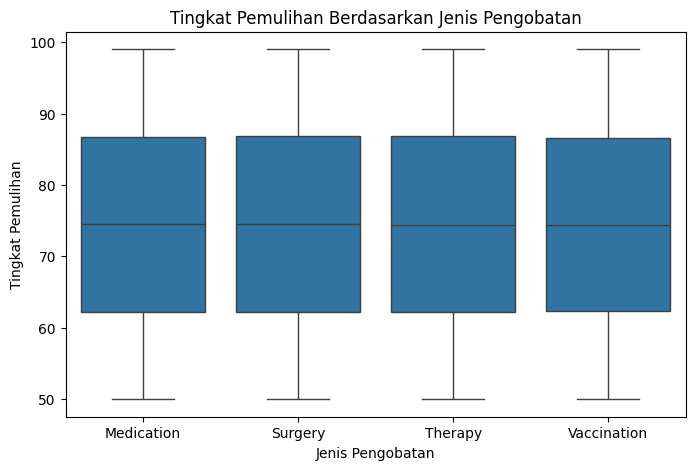

In [7]:
# 3. Uji ANOVA untuk melihat perbedaan tingkat pemulihan berdasarkan jenis pengobatan
anova_result = stats.f_oneway(
    df[df['trtmt_type'] == 'Medication']['rcvr_rate'],
    df[df['trtmt_type'] == 'Surgery']['rcvr_rate'],
    df[df['trtmt_type'] == 'Therapy']['rcvr_rate']
)
print(f'ANOVA tingkat pemulihan berdasarkan jenis pengobatan: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.5f}')

plt.figure(figsize=(8, 5))
sns.boxplot(x='trtmt_type', y='rcvr_rate', data=df)
plt.title('Tingkat Pemulihan Berdasarkan Jenis Pengobatan')
plt.xlabel('Jenis Pengobatan')
plt.ylabel('Tingkat Pemulihan')
plt.show()

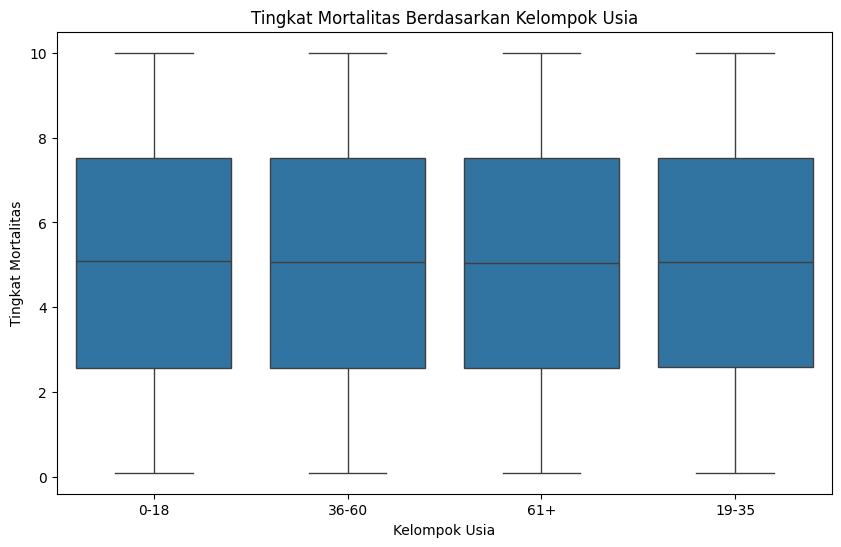

In [9]:


# 2. Perbandingan tingkat mortalitas berdasarkan kelompok usia
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='mortality_rate', data=df)
plt.title('Tingkat Mortalitas Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Tingkat Mortalitas')
plt.show()



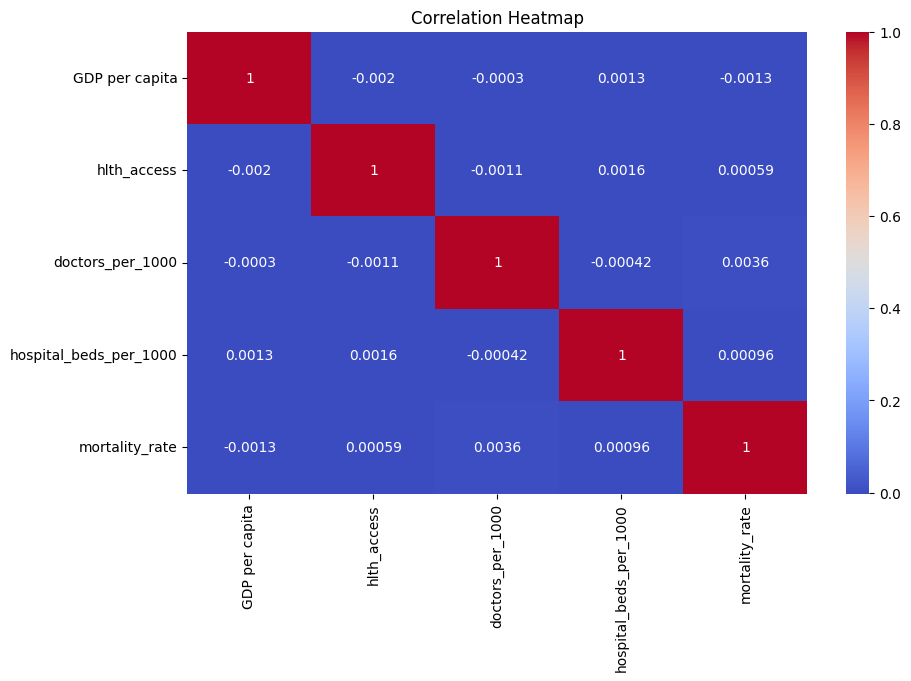

In [ ]:
#  Visualization: Heatmap of Correlation Matrix
correlation_matrix = df[['GDP per capita', 'hlth_access', 'doctors_per_1000', 'hospital_beds_per_1000', 'mortality_rate']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
